In [236]:
%pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [237]:
juarez = pd.read_excel('DATOS_Historicos.xlsx', sheet_name='SURESTE2')
san_nico = pd.read_excel('DATOS_Historicos.xlsx', sheet_name='NORTE2')

# Comprensión de los datos

1. Dimensión del dataset

In [238]:
# Dimensiones para todas las estaciones
hojas = ["SURESTE","NORESTE","CENTRO","NOROESTE","SUROESTE","NOROESTE2","NORTE","SUROESTE2","SURESTE2",
"SURESTE3","SUR","NORTE2","NORESTE2","NORESTE3","NOROESTE3"]
for hoja in hojas:
  df = pd.read_excel('DATOS_Historicos.xlsx', sheet_name=hoja)
  rows_df, cols_df = df.shape
  print(f'Estación {hoja} {cols_df} columnas y con {rows_df} filas')

Estación SURESTE 16 columnas y con 14255 filas
Estación NORESTE 16 columnas y con 14255 filas
Estación CENTRO 16 columnas y con 14255 filas
Estación NOROESTE 16 columnas y con 14255 filas
Estación SUROESTE 16 columnas y con 14255 filas
Estación NOROESTE2 16 columnas y con 14255 filas
Estación NORTE 16 columnas y con 14255 filas
Estación SUROESTE2 16 columnas y con 14255 filas
Estación SURESTE2 16 columnas y con 14255 filas
Estación SURESTE3 16 columnas y con 14255 filas
Estación SUR 16 columnas y con 14254 filas
Estación NORTE2 16 columnas y con 14255 filas
Estación NORESTE2 16 columnas y con 14255 filas
Estación NORESTE3 16 columnas y con 14254 filas
Estación NOROESTE3 16 columnas y con 6237 filas


In [239]:
# Para las estaciones que nos interesan
rows_juarez, cols_juarez = juarez.shape
rows_san_nico, cols_san_nico = san_nico.shape

print(f'Estación Juarez {cols_juarez} columnas y con {rows_juarez} filas')
print(f'Esación San Nicolás {cols_san_nico} columnas y con {rows_san_nico} filas')

Estación Juarez 16 columnas y con 14255 filas
Esación San Nicolás 16 columnas y con 14255 filas


2. Descripción de las variables

In [240]:
juarez.describe()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
count,12933.000000,13691.000000,13872.000000,13871.000000,13681.000000,13782.000000,12567.000000,13869.000000,14248.0,13828.000000,13706.000000,14095.000000,13886.000000,13546.000000,13512.000000
mean,1.457125,12.662348,13.220941,25.748201,27.262554,68.423233,29.271903,722.125424,0.0,57.512222,4.987531,0.129497,24.077160,4.692588,125.440497
std,0.668715,26.938311,10.084289,33.837180,16.152447,48.811466,21.286675,2.145813,0.0,21.066064,4.982616,0.186835,7.747574,4.426484,96.636106
min,0.000000,0.500000,0.600000,1.100000,3.000000,2.000000,2.000000,686.500000,0.0,1.000000,0.900000,0.000000,-1.180000,0.100000,1.000000
25%,0.950000,3.100000,6.200000,9.600000,16.000000,41.000000,15.000000,721.100000,0.0,41.000000,3.000000,0.000000,19.370000,1.400000,49.000000
50%,1.520000,4.700000,9.600000,14.500000,24.000000,56.000000,23.000000,722.000000,0.0,59.000000,3.800000,0.006000,24.740000,2.400000,94.000000
75%,1.800000,8.700000,17.300000,26.200000,36.000000,80.000000,37.000000,723.100000,0.0,75.000000,4.900000,0.230000,29.330000,7.400000,196.000000
max,7.090000,380.800000,76.200000,400.900000,158.000000,963.000000,364.000000,728.800000,0.0,92.000000,178.300000,0.644000,43.150000,27.400000,360.000000


In [241]:
tipos = juarez.dtypes
tipos = pd.DataFrame(tipos)

In [242]:
juarez_valores = juarez.describe()
juarez_valores = juarez_valores.transpose()
juarez_valores = juarez_valores[['min', 'max']]
juarez_valores.rename(columns={'min': "min_juarez", "max": "max_juarez"}, inplace=True)

In [243]:
san_nico_valores = san_nico.describe()
san_nico_valores = san_nico_valores.transpose()
san_nico_valores = san_nico_valores[['min', 'max']]
san_nico_valores.rename(columns={'min': "min_san_nico", "max": "max_san_nico"}, inplace=True)

In [244]:
summary = pd.concat([tipos, juarez_valores, san_nico_valores], axis=1)
summary.rename(columns={'': "tipo_dato"}, inplace=True)
summary['tipo'] = 'numerico'
summary.iloc[0, summary.columns.get_loc('tipo')] = 'fecha'
summary
# En esta tabla se ven los tipos de datos de los data frames, el minimo y maximo para cada estacion
# y si son variables categoricos o numericos

,0,min_juarez,max_juarez,min_san_nico,max_san_nico,tipo
date,datetime64[ns],NaN,NaN,NaN,NaN,fecha
CO,float64,0.00,7.090,0.17,5.210,numerico
NO,float64,0.50,380.800,0.60,365.500,numerico
NO2,float64,0.60,76.200,0.40,113.300,numerico
NOX,float64,1.10,400.900,1.80,410.300,numerico
O3,float64,3.00,158.000,1.00,163.000,numerico
PM10,float64,2.00,963.000,2.00,738.000,numerico
PM2.5,float64,2.00,364.000,1.00,370.000,numerico
PRS,float64,686.50,728.800,680.80,728.200,numerico
RAINF,float64,0.00,0.000,0.00,1.650,numerico


3. Calidad de datos

In [245]:
# valores nulos en porcentaje
juarez.isnull().sum() / juarez.count()
# con esto vemos en que columnas y cuantos valores nulos tenemos
# podemos ver que en PM2.5 hay tiene un 13% de valores nulos

date     0.000000
CO       0.102219
NO       0.041195
NO2      0.027610
NOX      0.027684
O3       0.041956
PM10     0.034320
PM2.5    0.134320
PRS      0.027832
RAINF    0.000491
RH       0.030879
SO2      0.040055
SR       0.011352
TOUT     0.026574
WSR      0.052340
WDR      0.054988
dtype: float64

In [246]:
san_nico.isnull().sum() / san_nico.count()
# Podemos ver que tiene muy pocos valores nulos

date     0.000000
CO       0.006354
NO       0.006780
NO2      0.006567
NOX      0.006567
O3       0.022964
PM10     0.017488
PM2.5    0.075200
PRS      0.007634
RAINF    0.006283
RH       0.009919
SO2      0.028128
SR       0.002602
TOUT     0.006496
WSR      0.006283
WDR      0.008276
dtype: float64

In [247]:
def faltantes(datos):
    fecha_inicial = min(datos['date'])
    fecha_final = max(datos['date'])
    rango_fechas = pd.date_range(start=fecha_inicial, end=fecha_final, freq='H') # creas todas las fechas

    df_fechas_completas = pd.DataFrame({'fecha': rango_fechas}) # haces dataframe

    # Ver que datos no estan
    fechas_faltantes = df_fechas_completas[~df_fechas_completas['fecha'].isin(datos['date'])]

    return fechas_faltantes

In [248]:
faltantes(juarez)

,fecha
9763,2023-02-11 19:00:00


In [249]:
faltantes(san_nico)
# Esos son registros que no llegaron a la base de datos

,fecha
9763,2023-02-11 19:00:00


In [250]:
# Valores atípicos con zscore por hora y dia de la semana para que sea una comparación justa en los componentes
# En caso de haber valores atipicos, primero se van a graficar para saber que hacer con ellos
juarez['dia_semana'] = juarez['date'].dt.dayofweek
juarez['hora'] = juarez['date'].dt.hour

# Calcular el Z-score por día de la semana y hora para todas las columnas diferentes de fecha
z_scores_juarez = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))
z_scores_juarez_outliers = z_scores_juarez > 3 # los que estan mas de 3 desviaicones estandar
print('Sumatoria de Atípicos por columnas en juarez')
z_scores_juarez_outliers.sum()

Sumatoria de Atípicos por columnas en juarez


/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/730317157.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_juarez = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


CO             99
NO            364
NO2           220
NOX           344
O3             95
PM10          242
PM2.5         191
PRS           139
RAINF           0
RH             73
SO2           308
SR            128
TOUT           41
WSR           173
WDR           102
dia_semana      0
hora            0
dtype: int64

In [251]:
juarez

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,dia_semana,hora
0,2022-01-01 00:00:00,7.09,133.6,43.9,177.5,17.0,550.0,NaN,719.5,0.0,67.0,4.8,0.000,21.75,1.0,319.0,5,0
1,2022-01-01 01:00:00,3.18,28.2,30.4,58.5,11.0,511.0,364.0,719.3,0.0,71.0,4.7,0.000,20.87,0.7,19.0,5,1
2,2022-01-01 02:00:00,3.60,54.9,35.3,90.1,9.0,260.0,NaN,719.3,0.0,74.0,5.4,0.000,20.02,1.2,290.0,5,2
3,2022-01-01 03:00:00,3.87,59.3,30.7,90.1,9.0,306.0,NaN,719.1,0.0,76.0,4.7,0.000,19.36,1.2,248.0,5,3
4,2022-01-01 04:00:00,4.56,88.1,28.4,116.6,9.0,295.0,NaN,719.1,0.0,78.0,4.4,0.000,18.69,1.2,272.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14250,2023-08-17 19:00:00,0.61,1.6,4.9,6.5,41.0,49.0,13.0,720.9,0.0,21.0,2.9,0.022,38.24,12.7,82.0,3,19
14251,2023-08-17 20:00:00,0.73,1.6,10.3,12.0,32.0,60.0,16.0,721.0,0.0,23.0,2.8,0.001,36.52,10.5,74.0,3,20
14252,2023-08-17 21:00:00,0.74,NaN,12.0,13.7,27.0,57.0,14.0,721.2,0.0,26.0,2.7,0.000,35.09,7.9,87.0,3,21
14253,2023-08-17 22:00:00,0.69,1.5,6.2,7.7,32.0,77.0,15.0,721.5,0.0,38.0,3.1,0.000,33.56,12.0,113.0,3,22


In [252]:
san_nico['dia_semana'] = san_nico['date'].dt.dayofweek
san_nico['hora'] = san_nico['date'].dt.hour

z_scores_san_nico = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))
z_scores_san_nico_outliers = z_scores_san_nico > 3
print('Sumatoria de Atípicos por columnas en San Nicolas')
z_scores_san_nico_outliers.sum()

Sumatoria de Atípicos por columnas en San Nicolas


/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/1530114544.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_san_nico = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


CO            231
NO            365
NO2           195
NOX           307
O3            109
PM10          255
PM2.5         168
PRS            75
RAINF         181
RH             55
SO2           239
SR             28
TOUT           37
WSR           146
WDR           268
dia_semana      0
hora            0
dtype: int64

In [18]:
# Hay muchos warnings por los valores faltantes, al rellenarlos, vamos a recalcular el Zscore.

In [253]:
# Para seguir explorando los atípicos, vamos a usar .describe(), para ver como se distribuyen
z_scores_juarez.describe()
# Se pueden ver los Zscores maximos por cada componente
# Se ve que hay malores mayores de 3 hasta 8 desviaciones atípicas, en general si hay zscores altos

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,dia_semana,hora
count,12933.000000,13691.000000,13872.000000,13871.000000,13681.000000,13782.000000,12567.000000,13869.000000,0.0,13828.000000,13706.000000,14095.000000,13886.000000,13546.000000,13512.000000,0.0,0.0
mean,0.797110,0.602223,0.759339,0.659791,0.782792,0.696971,0.748487,0.687925,NaN,0.777835,0.635915,0.766574,0.812574,0.768813,0.808305,NaN,NaN
std,0.593003,0.790634,0.641344,0.743374,0.612360,0.708575,0.653019,0.717414,NaN,0.618750,0.763804,0.632830,0.572405,0.629725,0.578131,NaN,NaN
min,0.000000,0.000230,0.000152,0.000000,0.000000,0.000168,0.000000,0.000000,NaN,0.000000,0.000000,0.000144,0.000208,0.000262,0.000000,NaN,NaN
25%,0.344954,0.276659,0.356955,0.294648,0.299521,0.285000,0.328275,0.219094,NaN,0.305070,0.250540,0.365413,0.374428,0.394879,0.392587,NaN,NaN
50%,0.717737,0.405292,0.646185,0.492528,0.658549,0.536172,0.632781,0.493534,NaN,0.640417,0.462259,0.505913,0.745277,0.613502,0.722443,NaN,NaN
75%,1.147898,0.569115,0.936246,0.689001,1.157101,0.852611,0.955455,0.941160,NaN,1.075005,0.723918,1.005018,1.110297,0.925486,1.090432,NaN,NaN
max,6.377369,8.943171,6.299224,8.261059,5.380287,7.953183,7.270828,8.535663,NaN,4.065703,8.366209,8.201327,3.993842,7.582739,4.341480,NaN,NaN


In [254]:
z_scores_san_nico.describe()
# Aca tambien hay valores diferentes, pero se puede ver que hay columnas más altas en
#comparacion con las del sur, como CO, PM2.5 y PRS.

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,dia_semana,hora
count,14165.000000,14159.000000,1.416200e+04,14162.000000,13935.000000,14010.000000,13258.000000,14147.000000,10537.000000,14115.000000,13865.000000,8.969000e+03,14163.000000,14166.000000,14138.000000,0.0,0.0
mean,0.713813,0.668490,7.639311e-01,0.717804,0.785278,0.692502,0.742046,0.764712,0.261457,0.774074,0.684006,8.160532e-01,0.813899,0.753394,0.695084,NaN,NaN
std,0.691842,0.735726,6.360622e-01,0.687697,0.609352,0.713082,0.660855,0.635113,0.959096,0.623646,0.721150,5.676924e-01,0.570727,0.648512,0.710641,NaN,NaN
min,0.000000,0.000092,2.624278e-16,0.000089,0.000000,0.000000,0.000000,0.000000,0.005624,0.000000,0.000330,1.215117e-16,0.000030,0.000350,0.000000,NaN,NaN
25%,0.254286,0.329143,3.397049e-01,0.328126,0.321736,0.263872,0.296314,0.281332,0.109109,0.294232,0.192072,3.944102e-01,0.379262,0.272069,0.220010,NaN,NaN
50%,0.552386,0.473644,6.598610e-01,0.573070,0.668536,0.539487,0.606105,0.600409,0.129869,0.628040,0.543427,7.375047e-01,0.743712,0.600270,0.503643,NaN,NaN
75%,0.957359,0.696426,9.762121e-01,0.836491,1.114556,0.873264,0.999726,1.092676,0.154314,1.094961,0.938006,1.077558e+00,1.108623,1.077161,0.890054,NaN,NaN
max,7.027075,7.726909,6.158872e+00,6.807033,5.659668,8.285118,8.374105,6.369589,9.111079,3.737941,8.402924,9.111079e+00,3.322840,6.063511,6.303924,NaN,NaN


# Visualización de datos pre-limpieza

In [255]:
# El punto de la visualización es comparar los valores, es por eso que los voy a juntar en un
# dataframe de prueba para comparar las emciones de las 2 estaciones
juarez['estacion'] = 'juarez'
san_nico['estacion'] = 'san_nico'
df_concatenado = pd.concat([juarez, san_nico], axis=0)
df_concatenado = df_concatenado.reset_index()
#sns.pairplot(df_concatenado, hue = 'estacion');

In [256]:
df_concatenado = df_concatenado.drop(columns=['index', 'hora', 'dia_semana'])

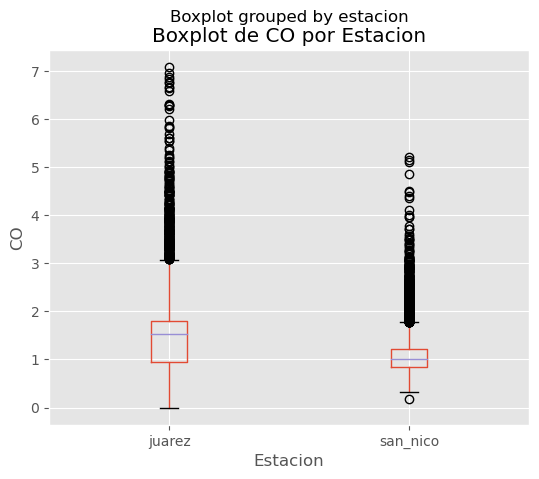

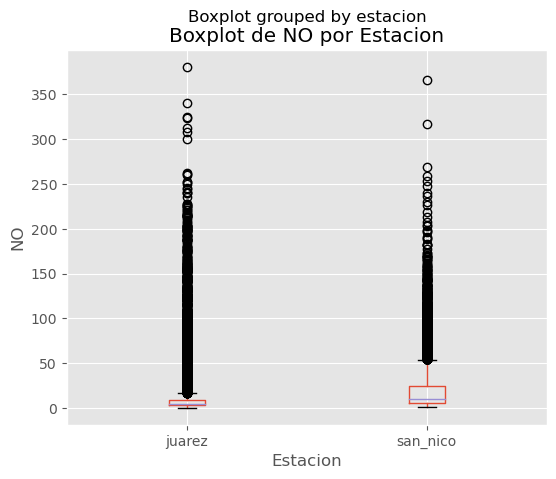

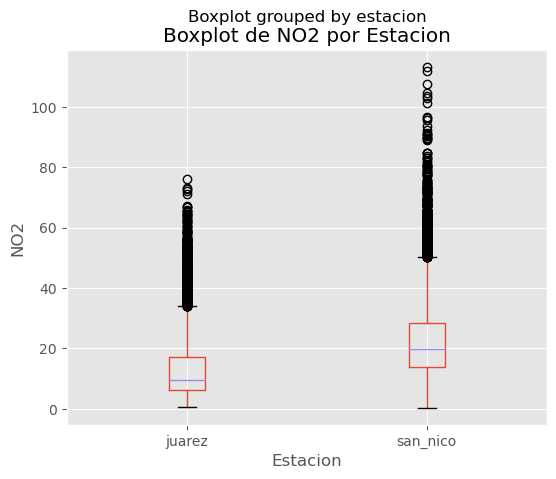

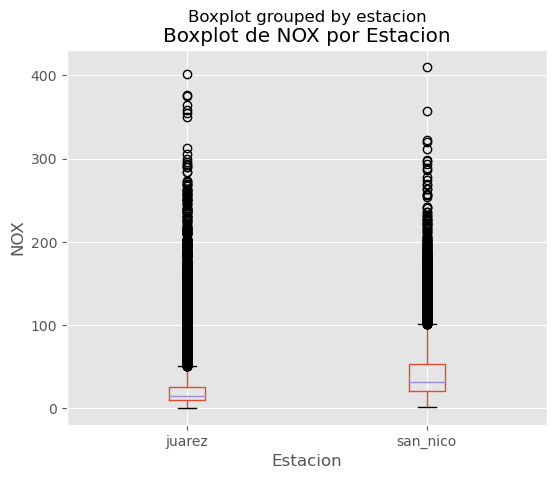

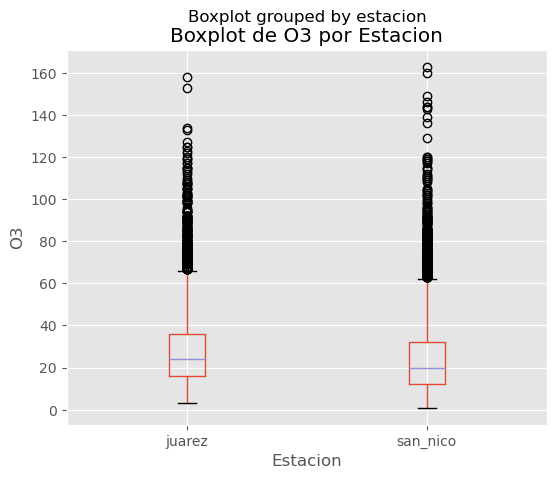

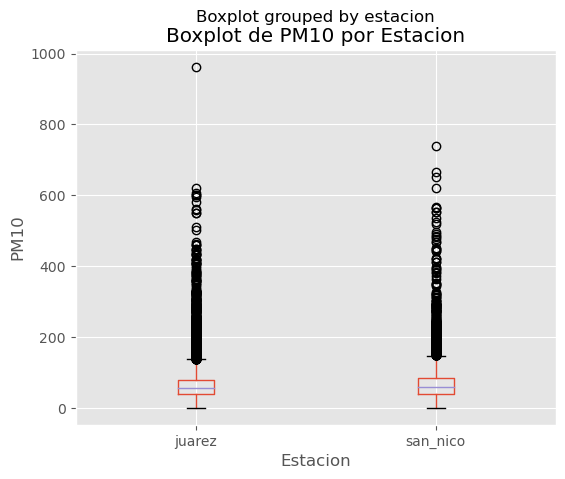

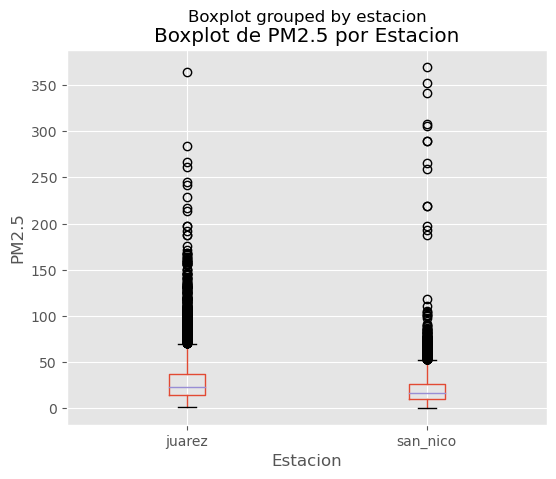

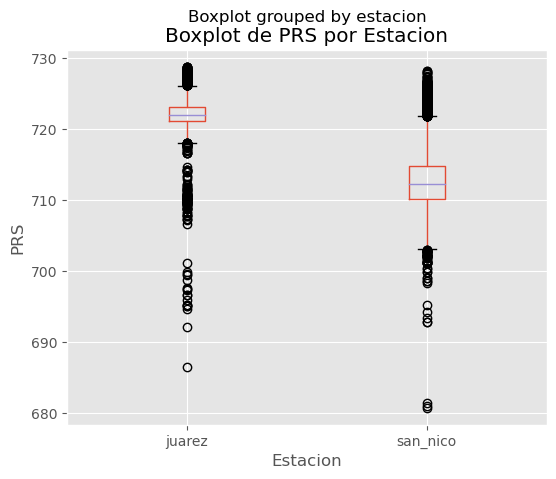

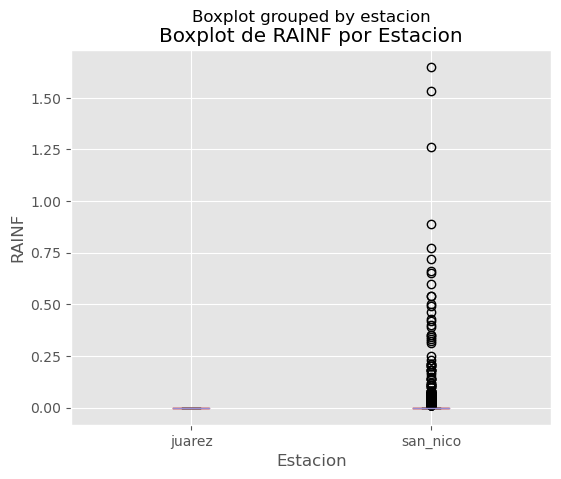

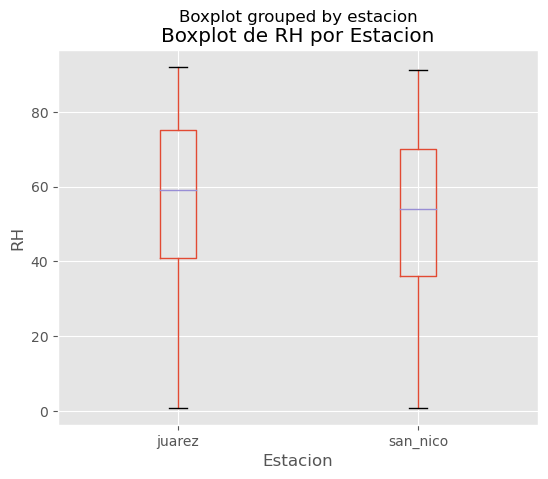

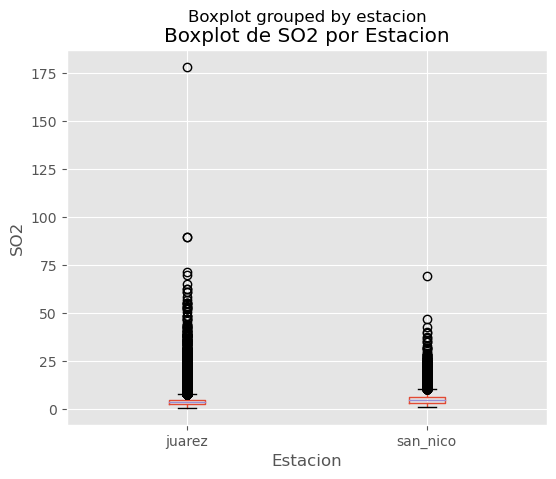

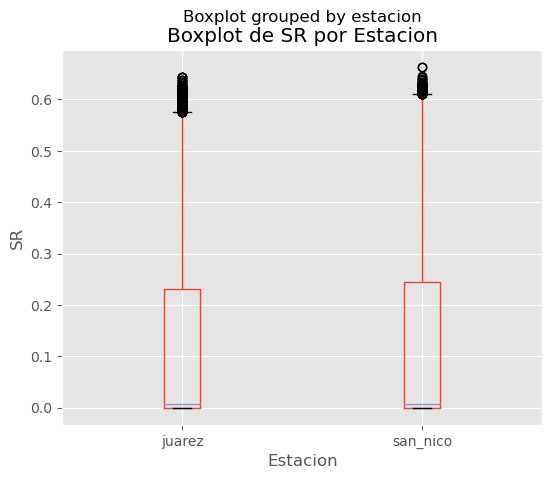

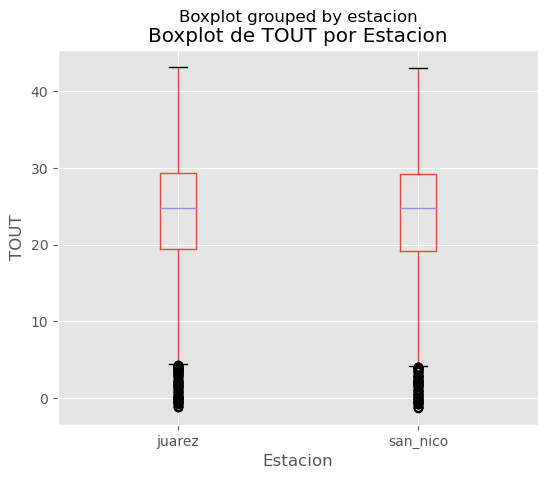

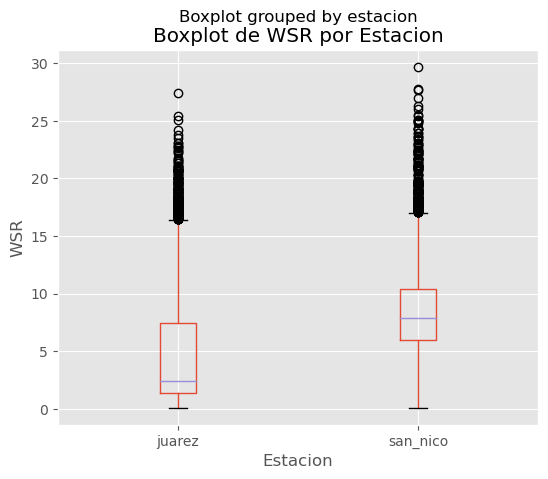

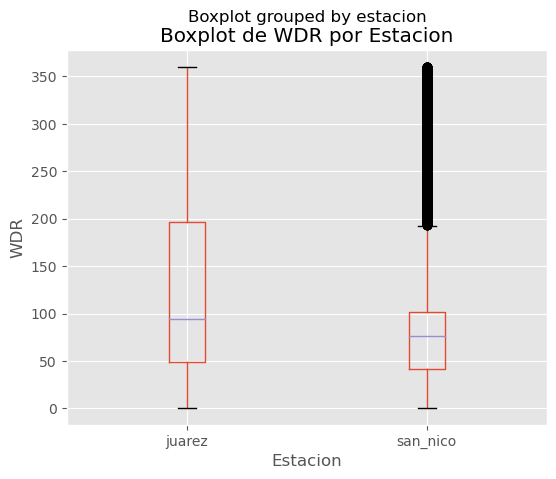

In [257]:
# Hacer boxplot para todas las columnas
for columna in df_concatenado:
    if columna != 'estacion' and columna != 'date':
        df_concatenado.boxplot(column=columna, by='estacion', grid=True, figsize=(6, 5))
        plt.title(f'Boxplot de {columna} por Estacion')
        plt.ylabel(columna)
        plt.xlabel('Estacion')
        plt.show()

De los boxplots se pueden ver que hay muchos valores atípicos, en el CO de Juarez, NO de Juarez, en el NO2 de San Nicolas, en el NOX de Juarez

# Preparación de datos

A. Selecciona el conjunto de datos

In [258]:
# No vamos a exluir columnas, son muy poquitos datos nulos para eliminarlos.

Nosotros queremos ver el impacto del tráfico en horas pica en el medio ambiente, por ello, nuestras columnas objetivo son las emisiones que producen los carros, como  NO, NO2, NOX, y CO y su impacto en el medio ambiente.


B. Limpieza de datos

In [259]:
# Valores duplicados
print(f'Hay {juarez.duplicated().sum()} valores duplicados en Juarez')
print(f'Hay {san_nico.duplicated().sum()} valores duplicados en San Nicolas')

Hay 0 valores duplicados en Juarez
Hay 0 valores duplicados en San Nicolas


In [260]:
san_nico = san_nico.drop(columns=['dia_semana', 'hora'])
juarez = juarez.drop(columns=['dia_semana', 'hora'])
# primer paso agregar los registros que faltan
# es curioso que las 2 estaciones hayan fallado el 11 de febrero a la misma hora.

faltante_juarez = {'date': '2023-02-11 19:00:00', 'CO': np.nan, 'NO': np.nan, 'NO2': np.nan,
                'NOX': np.nan, 'O3': np.nan, 'PM10': np.nan, 'PRS': np.nan, 'RAINF': np.nan, 'RH': np.nan,
                'SO2': np.nan, 'SR': np.nan, 'TOUT': np.nan, 'WSR': np.nan,
                'estacion': 'juarez'}

faltante_san_n = {'date': '2023-02-11 19:00:00', 'CO': np.nan, 'NO': np.nan, 'NO2': np.nan,
                'NOX': np.nan, 'O3': np.nan, 'PM10': np.nan, 'PRS': np.nan, 'RAINF': np.nan, 'RH': np.nan,
                'SO2': np.nan, 'SR': np.nan, 'TOUT': np.nan, 'WSR': np.nan,
                'estacion': 'san_nico'}

In [261]:
# agregandolos a noreste
faltante_san_n = pd.DataFrame([faltante_san_n])
faltante_san_n['date'] = pd.to_datetime(faltante_san_n['date'])
san_nico = pd.concat([san_nico, faltante_san_n], ignore_index=True)

In [262]:
# agregandolos a Sur
faltante_juarez = pd.DataFrame([faltante_juarez])
faltante_juarez['date'] = pd.to_datetime(faltante_juarez['date'])
juarez = pd.concat([juarez, faltante_juarez], ignore_index=True)

In [263]:
juarez['dia_semana'] = juarez['date'].dt.dayofweek
juarez['hora'] = juarez['date'].dt.hour

san_nico['dia_semana'] = san_nico['date'].dt.dayofweek
san_nico['hora'] = san_nico['date'].dt.hour

In [264]:
columnas = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PRS', 'RAINF', 'RH', 'PM2.5', 'WDR',
       'SO2', 'SR', 'TOUT', 'WSR']
# vamos a rellenar los valores nulos con el mismo groupby de hora y dia de la semana
# dentro de un for para que sea rápido
for x in columnas:
    juarez[x] = juarez[x].fillna(juarez.groupby(['dia_semana', 'hora'])[x].transform('mean'))
    san_nico[x] = san_nico[x].fillna(san_nico.groupby(['dia_semana', 'hora'])[x].transform('mean'))

In [265]:
juarez.isnull().sum()

date          0
CO            0
NO            0
NO2           0
NOX           0
O3            0
PM10          0
PM2.5         0
PRS           0
RAINF         0
RH            0
SO2           0
SR            0
TOUT          0
WSR           0
WDR           0
estacion      0
dia_semana    0
hora          0
dtype: int64

In [266]:
san_nico.isnull().sum()

date          0
CO            0
NO            0
NO2           0
NOX           0
O3            0
PM10          0
PM2.5         0
PRS           0
RAINF         0
RH            0
SO2           0
SR            0
TOUT          0
WSR           0
WDR           0
estacion      0
dia_semana    0
hora          0
dtype: int64

In [33]:
# Corregir valores atipicos
# para corregir los atípicos, hay que ser cuidadosos, para no regarla, antes de hacer la correcion
# vamos a hacer la comparacion por hora, para ver las diferencias entre los contaminantes
#sur_filtrado

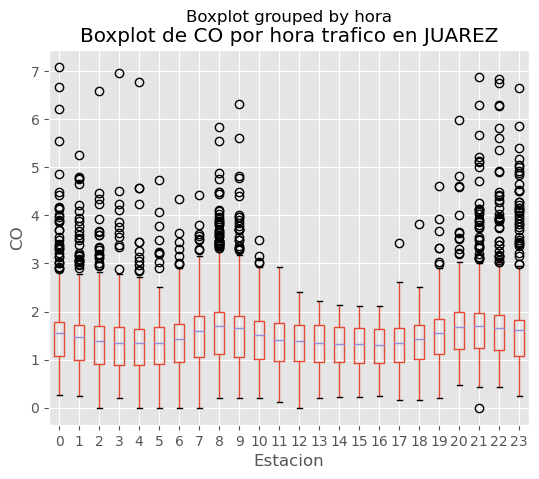

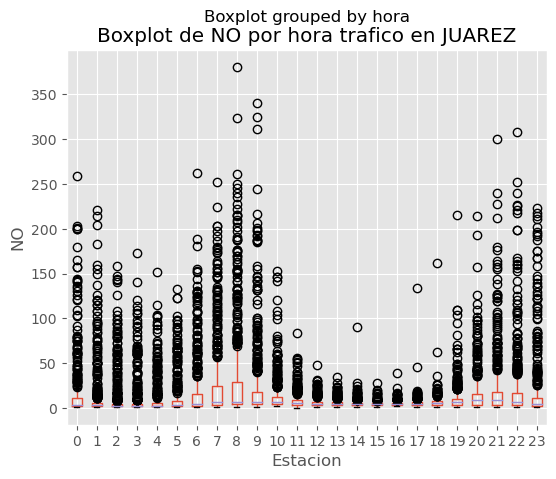

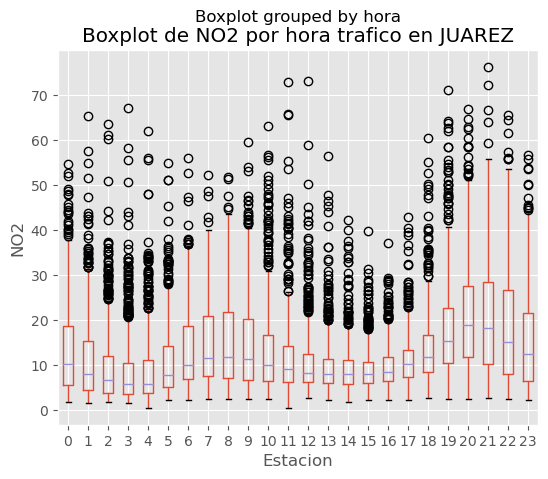

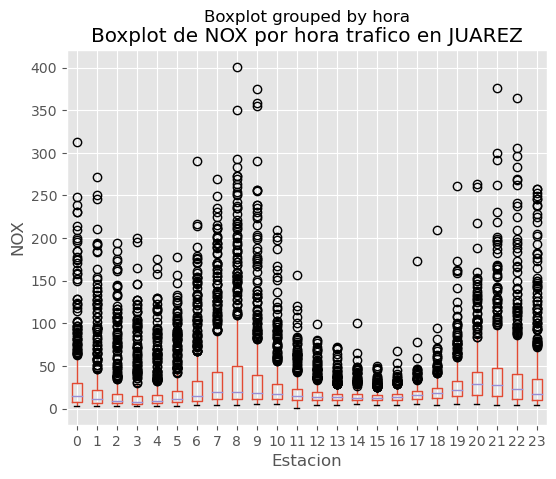

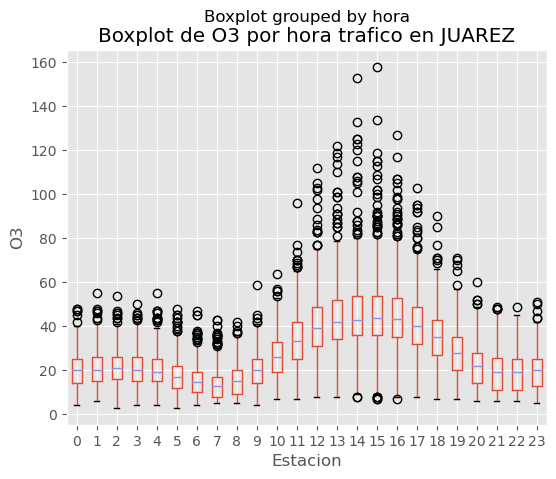

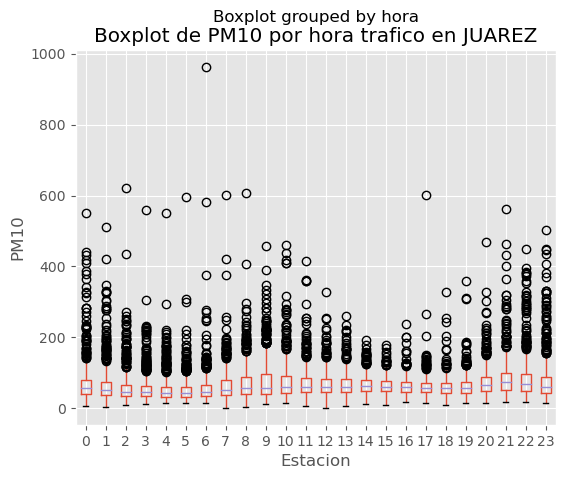

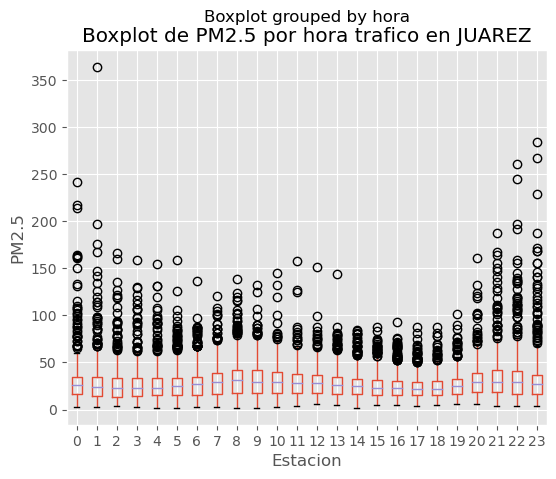

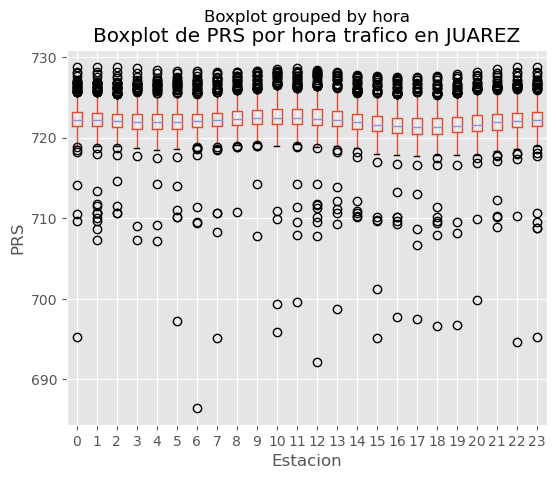

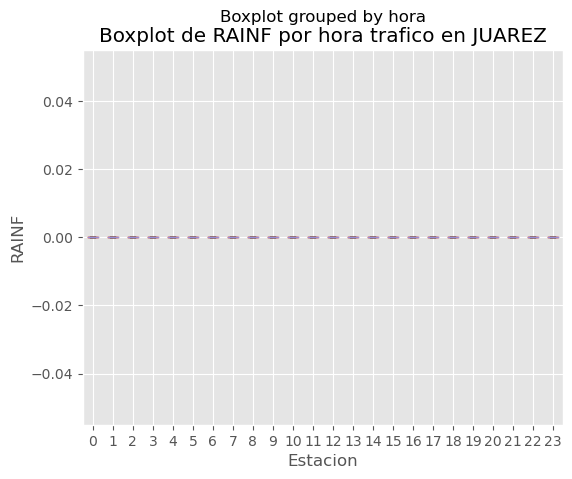

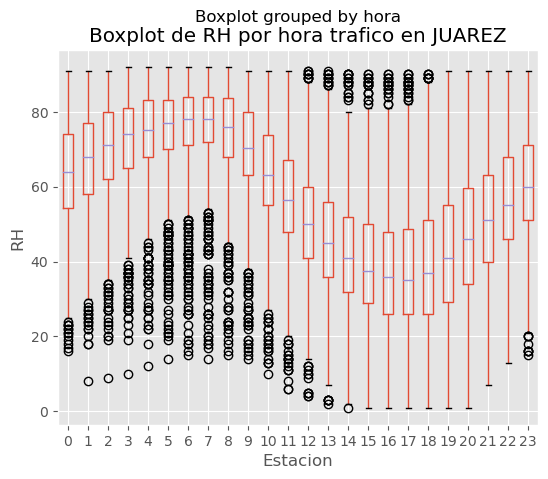

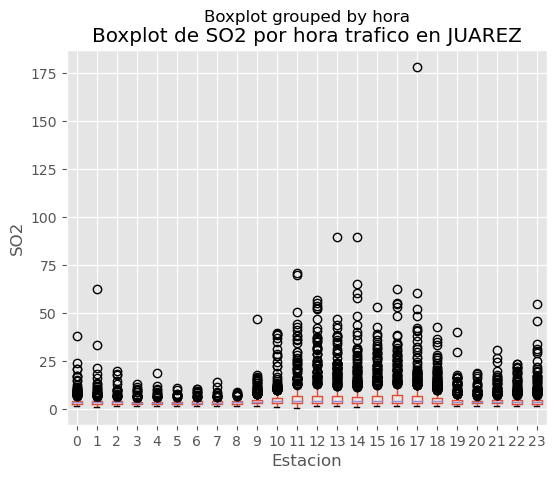

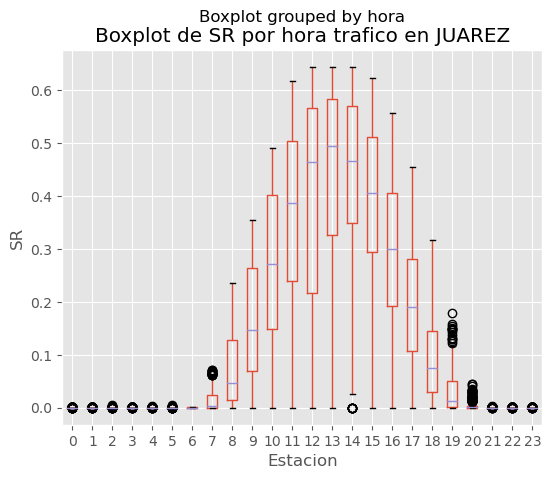

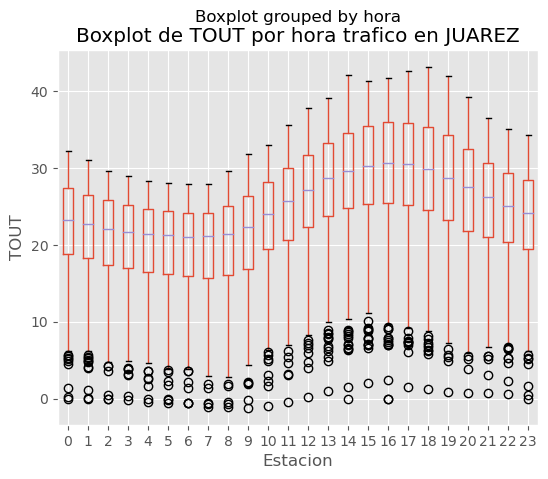

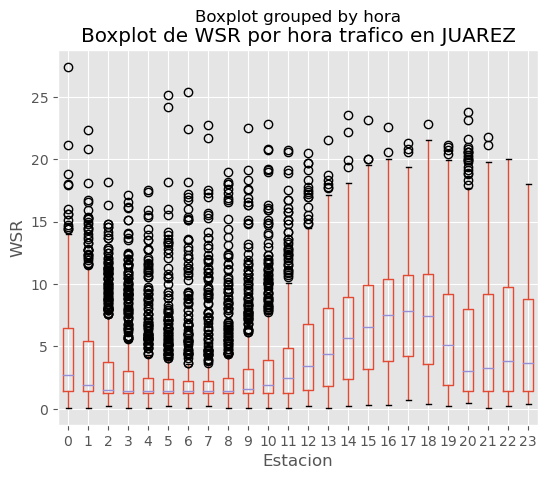

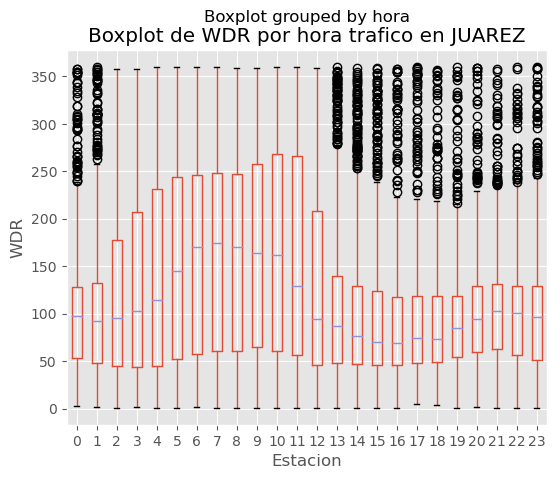

In [267]:
for columna in juarez:
    if columna != 'date' and columna != 'estacion' and columna !='hora' and columna != 'dia_semana':
        juarez.boxplot(column=columna, by='hora', grid=True, figsize=(6, 5))
        plt.title(f'Boxplot de {columna} por hora trafico en JUAREZ')
        plt.ylabel(columna)
        plt.xlabel('Estacion')
        plt.show()

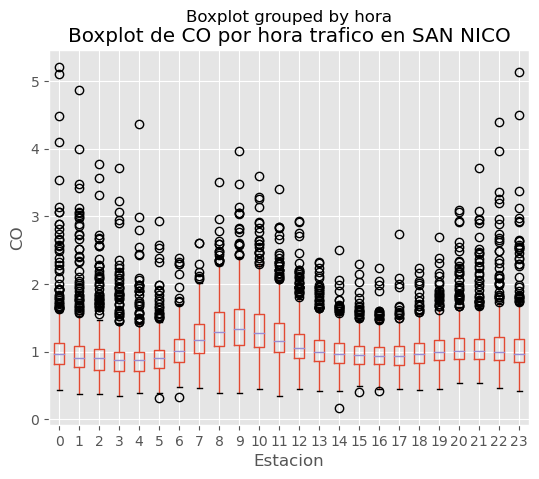

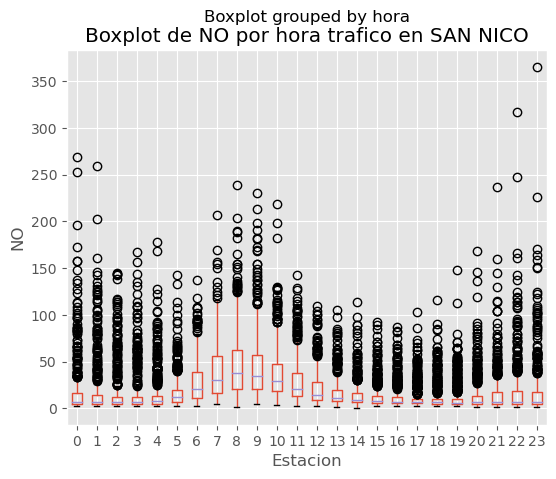

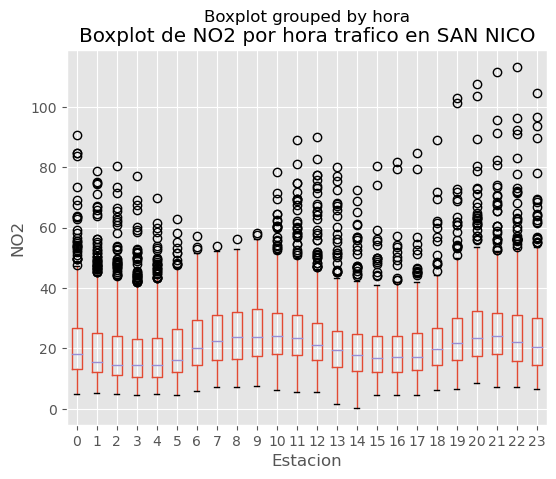

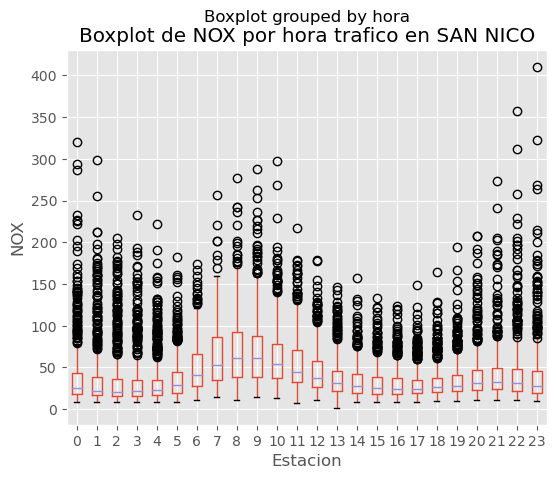

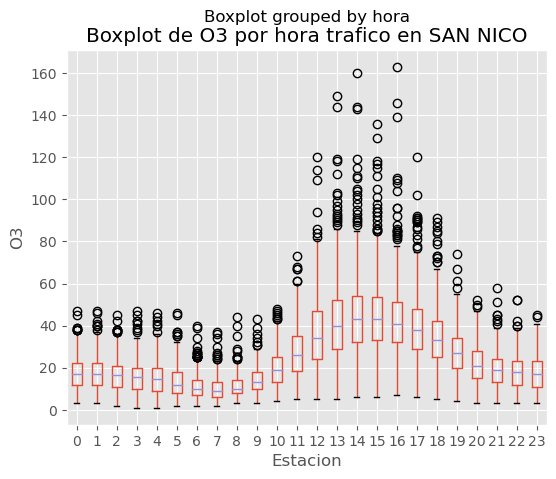

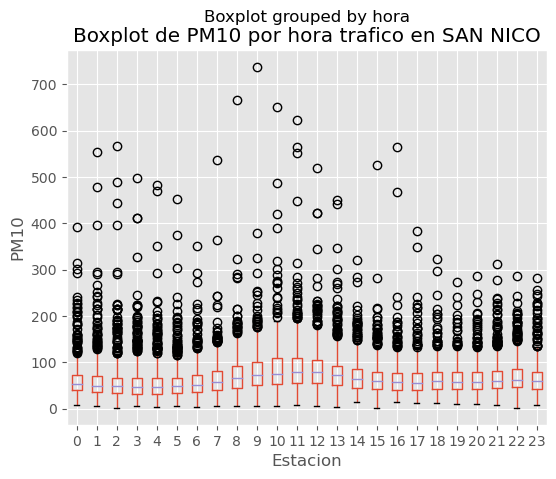

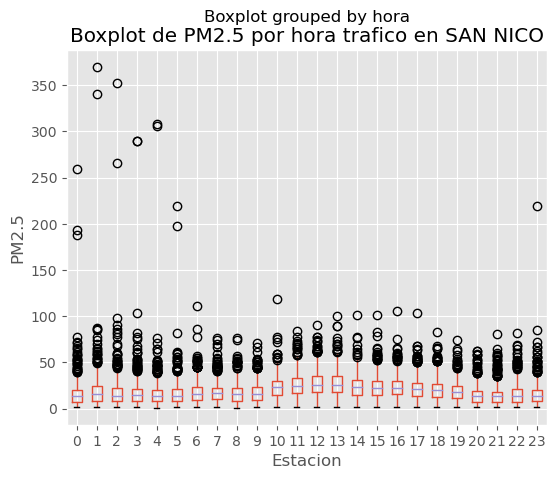

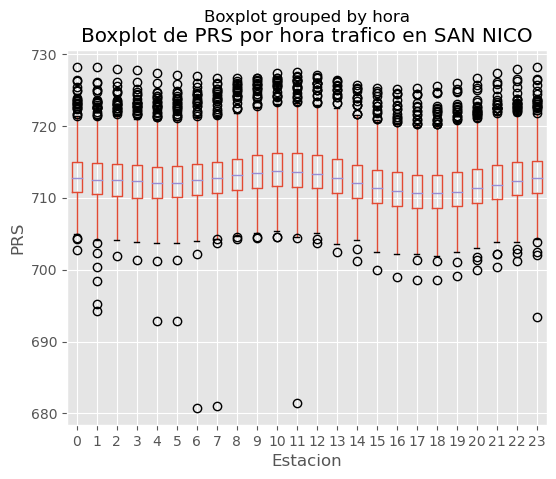

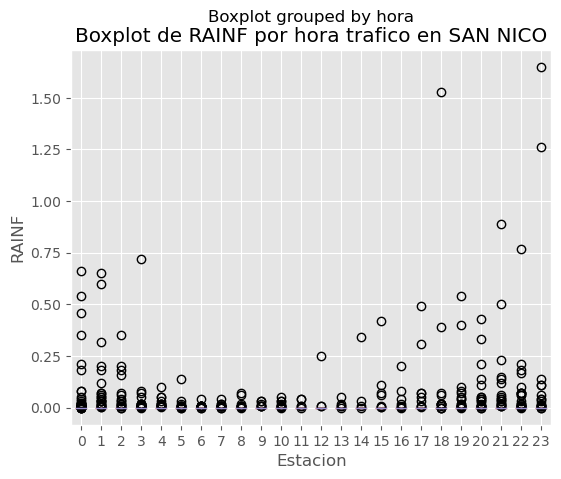

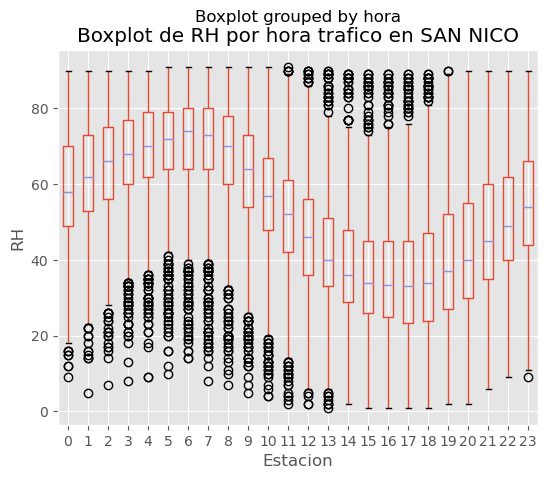

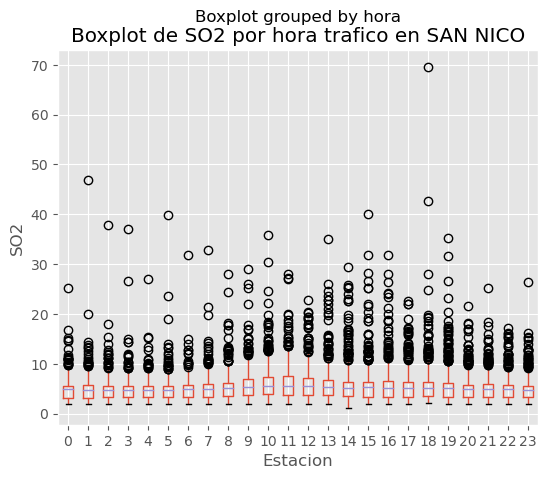

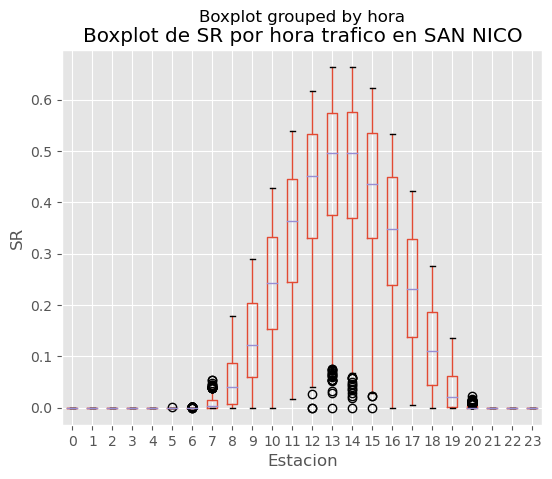

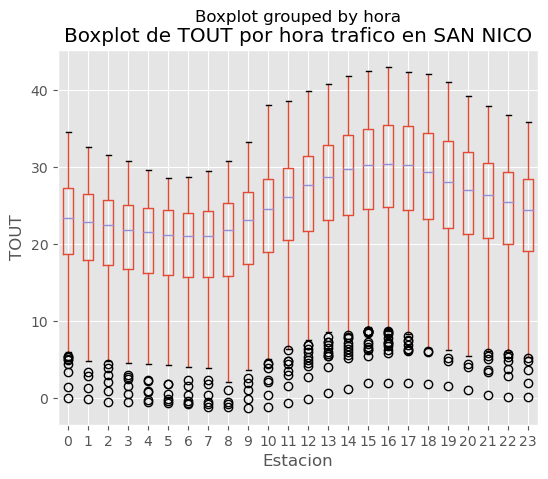

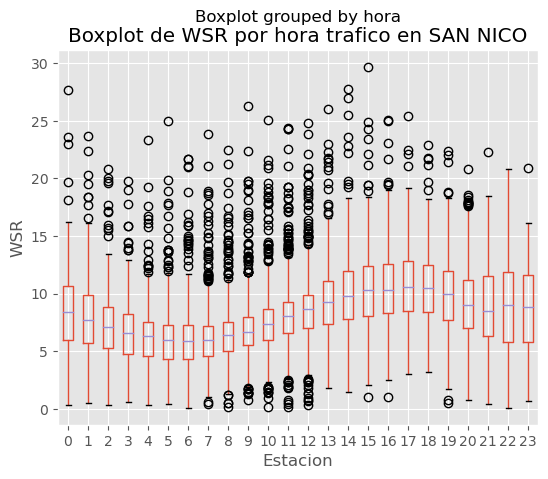

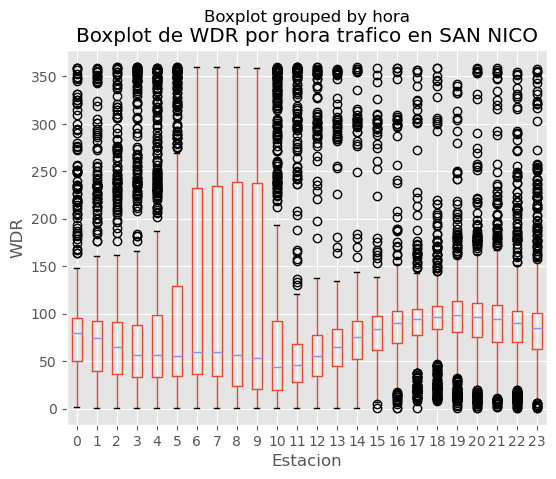

In [268]:
for columna in san_nico:
    if columna != 'date' and columna != 'estacion' and columna !='hora' and columna != 'dia_semana':
        san_nico.boxplot(column=columna, by='hora', grid=True, figsize=(6, 5))
        plt.title(f'Boxplot de {columna} por hora trafico en SAN NICO')
        plt.ylabel(columna)
        plt.xlabel('Estacion')
        plt.show()

In [269]:
print(juarez['RAINF'].value_counts())
print(san_nico['RAINF'].value_counts())
# Con el boxplot nos dimos cuenta que esta muy raro ese valor, al hacer
# el value_counts, vimos que solo hay ceros, lo vamos a quitar.
juarez = juarez.drop(columns=['RAINF'])
san_nico = san_nico.drop(columns=['RAINF'])

0.0    14256
Name: RAINF, dtype: int64
0.000000    13930
0.010000       88
0.020000       41
0.030000       21
0.040000       16
            ...  
0.660000        1
0.390000        1
0.004286        1
0.009048        1
0.001429        1
Name: RAINF, Length: 77, dtype: int64


In [270]:
juarez = juarez.drop(columns=['estacion'])
san_nico = san_nico.drop(columns=['estacion'])

In [38]:
# Ahora, ya viendo los boxplots, ya se ve por hora se ve como en la mañana y en la noche
# hay un incremento en los ocmportamientos, pero también se ven muchos valores atípicos, es por
# ellos que los vamos a recalcular

# Se recalculara el Zscore, porque ya no hay atipicos y posterior a identficar los atipicos,
# se llenara con la media

In [271]:
z_scores_san_nico_f = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/4132468669.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_san_nico_f = san_nico.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


In [272]:
z_scores_san_nico_f["date"] = san_nico["date"]
z_scores_san_nico_f["dia_semana"] = san_nico["dia_semana"]
z_scores_san_nico_f["hora"] = san_nico["hora"]

In [273]:
z_scores_juarez_f = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())
                                                                    /x.iloc[:, 1:].std()))

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/3040731394.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores_juarez_f = juarez.groupby(['dia_semana', 'hora']).apply(lambda x: (abs(x.iloc[:, 1:] - x.iloc[:, 1:].mean())


In [274]:
z_scores_juarez_f["date"] = juarez["date"]
z_scores_juarez_f["dia_semana"] = juarez["dia_semana"]
z_scores_juarez_f["hora"] = juarez["hora"]

In [43]:
juarez.to_excel("juarez.xlsx", index=False)
san_nico.to_excel("san_nico.xlsx", index=False)

In [275]:
def rellenar(datos,zscores ,columnas, stds):
  for columna in columnas:
      # Calculo de medias
      valor_medio = datos.groupby(['dia_semana', 'hora'])[columna].transform('mean')
      # Rellenar los valores atípicos con las medias sin atipicos
      datos[columna] = np.where(zscores[columna] > stds, valor_medio, datos[columna])

      return datos

In [276]:
columnas = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PRS', 'RH', 'SO2',
       'SR', 'TOUT', 'WSR', 'WDR']

In [277]:
juarez_limpios = rellenar(juarez, z_scores_juarez_f, columnas, 3)

In [278]:
san_nico_limpios = rellenar(san_nico, z_scores_san_nico_f, columnas, 3)

In [48]:
with pd.ExcelWriter('datos_limpios.xlsx') as writer:
    juarez_limpios.to_excel(writer, sheet_name='SUREST2', index=False)
    san_nico_limpios.to_excel(writer, sheet_name='NORTE2', index=False)

# Post Limpieza de Datos:

In [279]:
san_nico = pd.read_excel('datos_limpios.xlsx', sheet_name='NORTE2')
san_nico["mes"] = san_nico["date"].dt.month
san_nico["year"] = san_nico["date"].dt.year
juarez["mes"] = juarez["date"].dt.month
san_nico["dia"] = san_nico["dia_semana"]

1. Medidas de Tendencia y Dispersión para San Nicolás

In [280]:
san_nico.describe()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RH,SO2,SR,TOUT,WSR,WDR,dia_semana,hora,mes,year,dia
count,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000
mean,1.054590,20.461094,22.619174,43.065976,24.110266,69.083482,19.901919,712.715374,52.929606,5.392923,0.132309,23.919350,8.342512,95.360542,2.998316,11.500000,5.673401,2022.385522,2.998316
std,0.318258,25.081224,11.828041,33.471765,16.446976,45.546339,15.114693,4.100429,20.823141,2.974004,0.188201,7.684937,3.551118,84.257419,2.001332,6.922429,3.212211,0.486735,2.001332
min,0.320000,0.600000,0.400000,1.800000,1.000000,2.000000,1.000000,680.800000,1.000000,1.200000,0.000000,-1.210000,0.100000,1.000000,0.000000,0.000000,1.000000,2022.000000,0.000000
25%,0.850000,5.700000,13.800000,20.900000,12.000000,41.000000,11.000000,710.100000,36.000000,3.400000,0.000000,19.240000,6.000000,43.000000,1.000000,5.750000,3.000000,2022.000000,1.000000
50%,0.990298,10.000000,19.900000,31.700000,20.000000,59.000000,17.000000,712.300000,54.000000,5.000000,0.006000,24.680000,7.900000,77.000000,3.000000,11.500000,5.000000,2022.000000,3.000000
75%,1.200000,24.900000,28.400000,52.900000,32.000000,83.246914,26.000000,714.800000,70.000000,6.100000,0.244000,29.200000,10.400000,102.000000,5.000000,17.250000,8.000000,2023.000000,5.000000
max,3.030000,365.500000,113.300000,410.300000,163.000000,738.000000,370.000000,728.200000,91.000000,69.600000,0.664000,43.020000,29.700000,360.000000,6.000000,23.000000,12.000000,2023.000000,6.000000


2. Box plots con los datos limpios

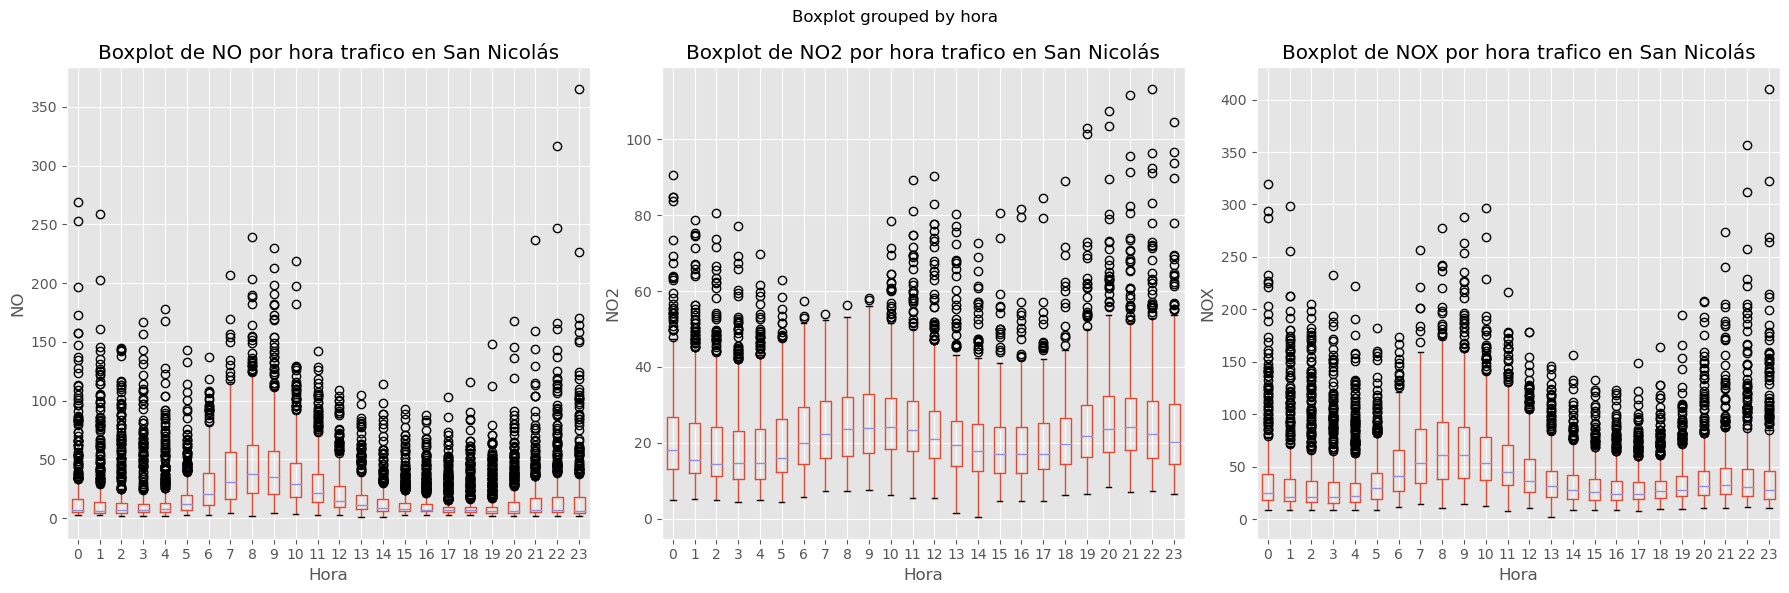

In [281]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_num = 0

for columna in san_nico.columns:
    if columna == 'NO' or columna =='NO2' or columna == 'NOX':
        san_nico.boxplot(column=columna, by='hora', grid=True, ax=axes[plot_num])
        axes[plot_num].set_title(f'Boxplot de {columna} por hora trafico en San Nicolás')
        axes[plot_num].set_ylabel(columna)
        axes[plot_num].set_xlabel('Hora')
        
        plot_num += 1

plt.tight_layout()
plt.show()

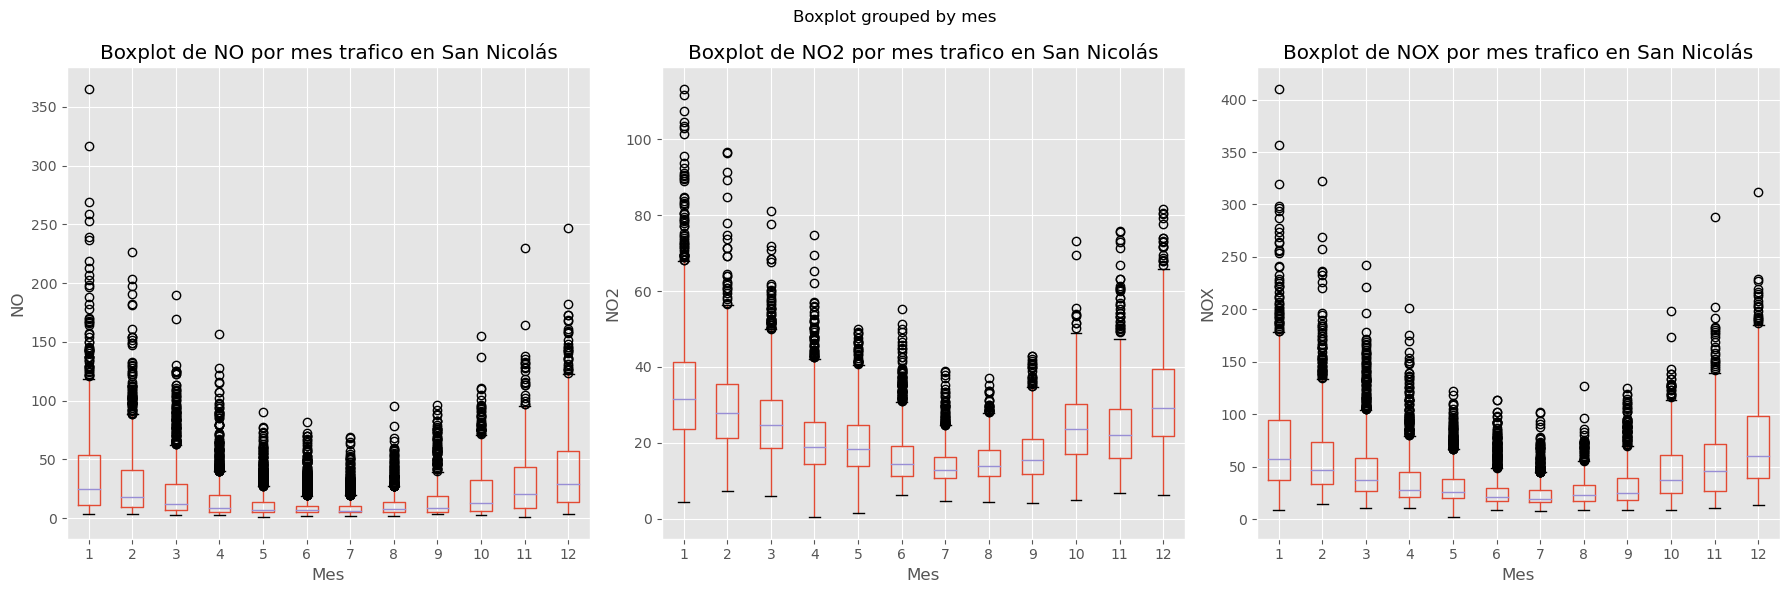

In [282]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_num = 0

for columna in san_nico.columns:
    if columna == 'NO' or columna =='NO2' or columna == 'NOX':
        san_nico.boxplot(column=columna, by='mes', grid=True, ax=axes[plot_num])
        axes[plot_num].set_title(f'Boxplot de {columna} por mes trafico en San Nicolás')
        axes[plot_num].set_ylabel(columna)
        axes[plot_num].set_xlabel('Mes')
        
        plot_num += 1

plt.tight_layout()
plt.show()

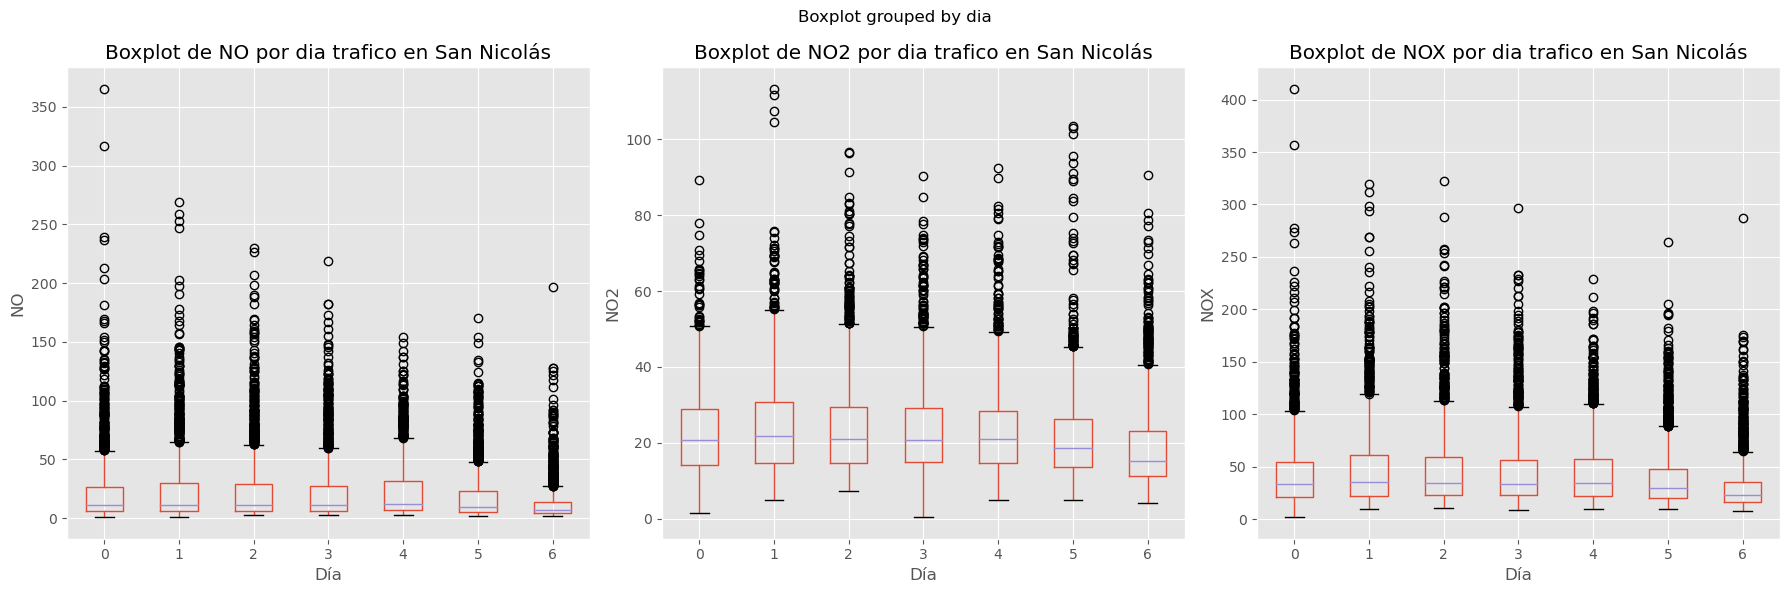

In [283]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

plot_num = 0

for columna in san_nico.columns:
    if columna != 'date' and columna != 'estacion' and columna !='hora' and columna != 'dia' and (columna == 'NO' or columna =='NO2' or columna == 'NOX'):
        san_nico.boxplot(column=columna, by='dia', grid=True, ax=axes[plot_num])
        axes[plot_num].set_title(f'Boxplot de {columna} por dia trafico en San Nicolás')
        axes[plot_num].set_ylabel(columna)
        axes[plot_num].set_xlabel('Día')
        
        plot_num += 1

plt.tight_layout()
plt.show()

3. Matriz de Correlación

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/322103885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = san_nico.corr()


<Axes: >

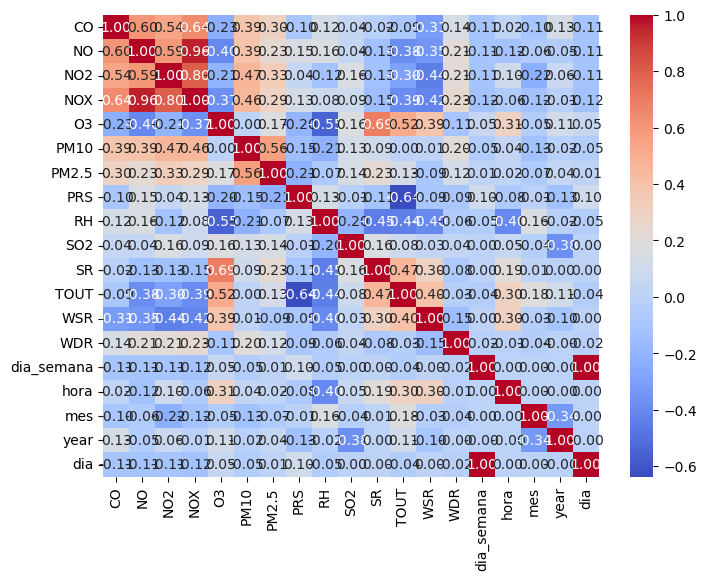

In [54]:
cor = san_nico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")

# Predicción

In [284]:
san_nico.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RH,SO2,SR,TOUT,WSR,WDR,dia_semana,hora,mes,year,dia
0,2022-01-01 00:00:00,1.045122,83.1,58.2,141.4,12.0,293.0,259.0,706.2,60.0,6.1,0.0,22.17,1.3,290.0,5,0,1,2022,5
1,2022-01-01 01:00:00,0.983412,62.1,49.4,111.5,8.0,554.0,370.0,705.8,65.0,6.0,0.0,21.39,2.8,288.0,5,1,1,2022,5
2,2022-01-01 02:00:00,0.932588,34.5,45.9,80.3,7.0,397.0,266.0,705.7,62.0,7.6,0.0,20.95,2.8,295.0,5,2,1,2022,5
3,2022-01-01 03:00:00,0.917882,53.4,45.1,98.5,8.0,412.0,290.0,705.4,65.0,7.7,0.0,20.14,3.5,238.0,5,3,1,2022,5
4,2022-01-01 04:00:00,0.917294,52.5,43.6,96.1,7.0,470.0,306.0,705.4,67.0,7.1,0.0,19.56,3.9,257.0,5,4,1,2022,5


In [285]:
no_series = san_nico['NO']
nox_series = san_nico['NOX']
no2_series = san_nico['NO2']

from statsmodels.tsa.stattools import adfuller

result_no = adfuller(no_series)
print("P-valor para la prueba de Dickey-Fuller de la serie 'NO':", result_no[1])

result_nox = adfuller(nox_series)
print("P-valor para la prueba de Dickey-Fuller de la serie 'NOX':", result_nox[1])

result_no2 = adfuller(no2_series)

print("P-valor para la prueba de Dickey-Fuller de la serie 'NO2':", result_no2[1])

P-valor para la prueba de Dickey-Fuller de la serie 'NO': 8.311841377927637e-19
P-valor para la prueba de Dickey-Fuller de la serie 'NOX': 7.753333471938003e-16
P-valor para la prueba de Dickey-Fuller de la serie 'NO2': 4.7027027033105944e-15


Los datos muestran estacionalidad. 

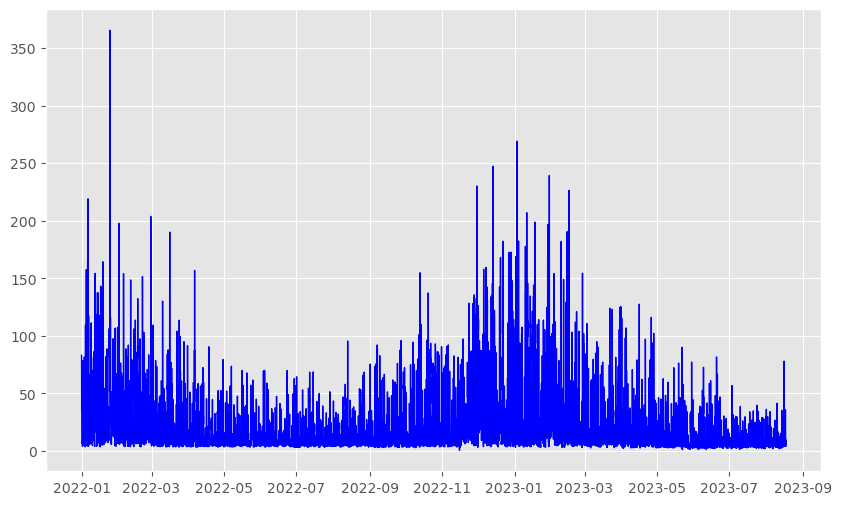

In [286]:
plt.figure(figsize=(10, 6))  
plt.plot(san_nico['date'], san_nico['NO'], color='b', linestyle='-', linewidth=1)


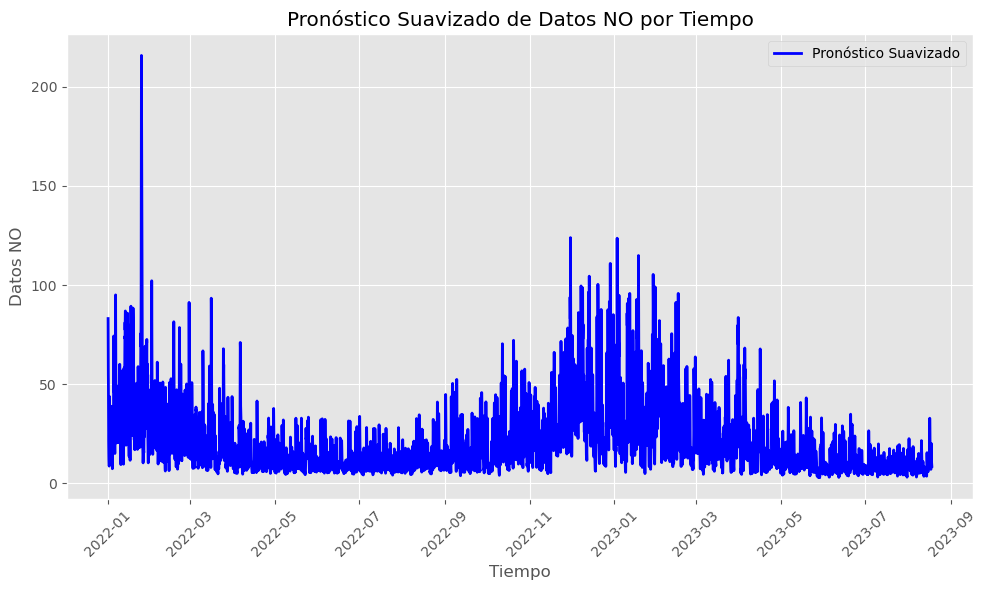

In [287]:
import pandas as pd
import matplotlib.pyplot as plt

san_nico = san_nico.sort_values(by='date')

san_nico['NO_suavizado'] = san_nico['NO'].ewm(span=10).mean()

plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.plot(san_nico['date'], san_nico['NO_suavizado'], color='b', linestyle='-', linewidth=2, label='Pronóstico Suavizado')

plt.xlabel('Tiempo')
plt.ylabel('Datos NO')
plt.title('Pronóstico Suavizado de Datos NO por Tiempo')

plt.xticks(rotation=45)  
plt.tight_layout()  
plt.legend()  
plt.show()


In [59]:
san_nico.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RH,...,SR,TOUT,WSR,WDR,dia_semana,hora,mes,year,dia,NO_suavizado
0,2022-01-01 00:00:00,1.045122,83.1,58.2,141.4,12.0,293.0,259.0,706.2,60.0,...,0.0,22.17,1.3,290.0,5,0,1,2022,5,83.100000
1,2022-01-01 01:00:00,0.983412,62.1,49.4,111.5,8.0,554.0,370.0,705.8,65.0,...,0.0,21.39,2.8,288.0,5,1,1,2022,5,71.550000
2,2022-01-01 02:00:00,0.932588,34.5,45.9,80.3,7.0,397.0,266.0,705.7,62.0,...,0.0,20.95,2.8,295.0,5,2,1,2022,5,56.656146
3,2022-01-01 03:00:00,0.917882,53.4,45.1,98.5,8.0,412.0,290.0,705.4,65.0,...,0.0,20.14,3.5,238.0,5,3,1,2022,5,55.583391
4,2022-01-01 04:00:00,0.917294,52.5,43.6,96.1,7.0,470.0,306.0,705.4,67.0,...,0.0,19.56,3.9,257.0,5,4,1,2022,5,54.698233


Es estacionaria, tiene un comportamiento cíclico.

"NO" - es estacionaria. 

Intentando con promedio movil

In [288]:
san_nico['pred'] = san_nico['NO'].rolling(window=3).mean()

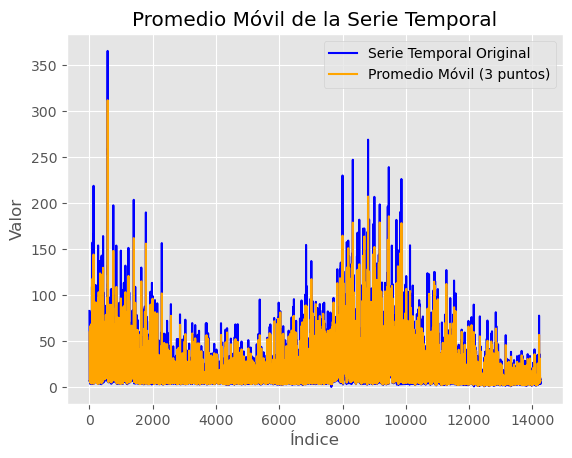

In [323]:
plt.plot(san_nico['NO'], label='Serie Temporal Original', color="blue")
plt.plot(san_nico['pred'], label=f'Promedio Móvil ({3} puntos)', color="orange")
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Promedio Móvil de la Serie Temporal')
plt.show()

In [290]:
squared_diff_sum = np.sum((san_nico['NO'].loc[~san_nico['pred'].isna()] - san_nico['pred'].loc[~san_nico['pred'].isna()]) ** 2) / san_nico.shape[0]

print("Suma de cuadrados de las diferencias (ignorando los primeros 2 NA):", squared_diff_sum)

Suma de cuadrados de las diferencias (ignorando los primeros 2 NA): 121.55739625626718


In [291]:
filtered_data = san_nico.loc[~san_nico['pred'].isna()]

N = len(filtered_data)  
y_real = filtered_data['NO'] 
y_pred = filtered_data['pred']  

epam = (np.abs((y_real - y_pred) / y_real).sum() / N) * 100

print('Error Porcentual Absoluto Medio (EPAM):', epam)

Error Porcentual Absoluto Medio (EPAM): 29.697765373947927


In [292]:
longitud_df = len(san_nico)
serie = [1,2,3,4]

san_nico['semana'] = serie * (longitud_df // len(serie)) + serie[:longitud_df % len(serie)]

In [293]:
agrupado_years = san_nico.groupby(['year', 'mes']).mean().reset_index()
agrupado_weeks = san_nico.groupby(['year', 'mes', 'semana']).mean().reset_index()
agrupado_days = san_nico.groupby(['dia_semana', 'hora']).mean().reset_index()

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/482463936.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_years = san_nico.groupby(['year', 'mes']).mean().reset_index()
/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/482463936.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agrupado_weeks = san_nico.groupby(['year', 'mes', 'semana']).mean().reset_index()
/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_61033/482463936.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only wi

In [294]:
x = agrupado_years['nrow_column'] = range(1, agrupado_years.shape[0] + 1)
x1 = agrupado_weeks['nrow_column'] = range(1, agrupado_weeks.shape[0]+1)
x2 = agrupado_days['nrow_column'] = range(1, agrupado_days.shape[0]+1)

In [295]:
agrupado_weeks

,year,mes,semana,CO,NO,NO2,NOX,O3,PM10,PM2.5,...,SR,TOUT,WSR,WDR,dia_semana,hora,dia,NO_suavizado,pred,nrow_column
0,2022,1,1,0.989095,40.218280,34.273118,74.460753,17.417432,86.899834,24.423766,...,0.077457,14.788772,7.729570,109.311828,3.064516,10.0,3.064516,40.002013,39.629462,1
1,2022,1,2,0.967854,39.597888,33.268676,72.829359,18.226052,92.682530,23.301625,...,0.077952,14.876816,7.936777,116.210908,3.064516,11.0,3.064516,39.878635,39.375508,2
2,2022,1,3,0.965689,40.313178,33.662145,73.934583,18.434534,90.855953,23.807926,...,0.074172,14.886576,7.730613,116.505632,3.064516,12.0,3.064516,39.900444,40.043115,3
3,2022,1,4,0.968647,38.808602,34.401613,73.171505,17.092774,89.430556,23.574565,...,0.076366,14.748011,7.612366,112.241935,3.064516,13.0,3.064516,39.689493,39.573223,4
4,2022,2,1,0.978113,29.058841,27.951197,56.978863,20.883291,67.712641,17.216618,...,0.110485,14.997819,8.395051,100.990342,3.000000,10.0,3.000000,28.197951,28.405049,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023,7,4,0.944731,8.364516,14.390323,22.740860,29.979466,52.030612,18.677202,...,0.170011,30.323978,9.516667,78.150538,3.064516,13.0,3.064516,8.503840,8.536548,76
76,2023,8,1,1.020944,9.183563,14.794759,23.967357,27.978772,49.976277,15.329710,...,0.169676,31.892206,7.912951,76.695110,2.823529,10.0,2.823529,9.323853,9.518377,77
77,2023,8,2,1.029902,8.578431,13.840196,22.413725,28.623296,49.901961,17.019489,...,0.176294,31.943529,8.108824,75.921569,2.823529,11.0,2.823529,9.188322,9.297462,78
78,2023,8,3,1.020196,9.285294,14.170588,23.441176,28.073996,53.362745,17.010184,...,0.177010,31.881078,8.154902,72.107843,2.823529,12.0,2.823529,9.205953,9.015763,79


## Análisis de Discriminante

In [299]:
def asignar_estacion(mes):
    if mes in [1, 2, 3, 10, 11, 12]:
        return "Invierno"
    elif mes in [4, 5, 6, 7, 8, 9]:
        return "Verano"

san_nico['estación'] = san_nico['mes'].apply(asignar_estacion)

san_nico['estacion'] = san_nico['estación']

In [300]:
#manejando un valor negativo por ahí
san_nico['TOUT'] = san_nico['TOUT'].apply(lambda x: 0.0001 if x < 0 else x)

X = san_nico[['NO', 'NO2', 'NOX', 'TOUT']]
Y = san_nico['estacion']

# modelo LDA
modelo = LinearDiscriminantAnalysis()
modelo.fit(X, Y)

predicted_classes = modelo.predict(X)


accuracy_rate = (predicted_classes == Y).mean() * 100
print("El porcentaje de observaciones clasificadas correctamente es: {:.2f}%".format(accuracy_rate))


El porcentaje de observaciones clasificadas correctamente es: 83.38%


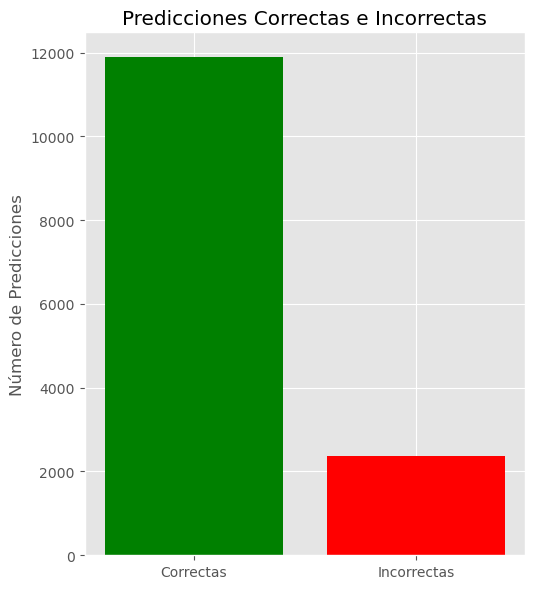

In [301]:
plt.figure(figsize=(10, 6))

correct_predictions = (predicted_classes == Y).sum()
incorrect_predictions = len(predicted_classes) - correct_predictions

plt.subplot(1, 2, 2)
plt.bar(['Correctas', 'Incorrectas'], [correct_predictions, incorrect_predictions], color=['green', 'red'])
plt.ylabel('Número de Predicciones')
plt.title('Predicciones Correctas e Incorrectas')

plt.tight_layout()
plt.show()


In [302]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

nuevo_no = float(input("Ingrese el valor de NO: "))
nuevo_no2 = float(input("Ingrese el valor de NO2: "))
nuevo_nox = float(input("Ingrese el valor de NOX: "))
nuevo_tout = float(input("Ingrese el valor de TOUT: "))


# Crear un DataFrame para la nueva observación con nombres de características
nueva_observacion_df = pd.DataFrame({
    'NO': [nuevo_no],
    'NO2': [nuevo_no2],
    'NOX': [nuevo_nox],
    'TOUT': [nuevo_tout]
})

# Cargar el modelo entrenado (asegúrate de tener el modelo guardado previamente)
modelo = LinearDiscriminantAnalysis()
modelo.fit(X, Y)  # Reemplaza con tus datos de entrenamiento

# Predecir la estación para la nueva observación utilizando el modelo LDA
prediccion = modelo.predict(nueva_observacion_df)

# Imprimir la predicción
if prediccion[0] == 'Invierno':
    print("La estación predicha es: Invierno")
else:
    print("La estación predicha es: Verano")


La estación predicha es: Invierno


In [313]:
sample = pd.read_csv("prueba_discr.csv")